The idea here is to simulate $500$ trees with $20$ and $200$ taxa and apply `BNPR()` with and without `pc_prior = TRUE`.

In [1]:
## uncomment these lines to install the stuff from my github
# devtools::install_github("maxbiostat/timeTreeSim")
# devtools::install_github("maxbiostat/phylodyn", ref = "new_pc_prior")
library(ggplot2)
library(phylodyn)

In [2]:
date_min <- 1990
date_max <- 2021

const10 <- function(x){
  return (rep(10, length(x)))
}

nrep <- 500

In [3]:

stimes20 <- sort(runif(20, date_min, date_max))

genealogies_20taxa <- lapply(1:nrep, function(i){
  phylodyn::coalsim(samp_times = stimes20,
               n_sampled = rep(1, 20),
               traj = const10,
               lower_bound = 1)
})

In [4]:
stimes200 <- sort(runif(200, date_min, date_max))

genealogies_200taxa <- lapply(1:nrep, function(i){
    phylodyn::coalsim(samp_times = stimes200,
               n_sampled = rep(1, 200),
               traj = const10,
               lower_bound = 1)
})

In [5]:
system.time(
    reconstructions_20taxa_gamma <- lapply(genealogies_20taxa, function(x) BNPR(data = x, lengthout = 100))
                                           
)
system.time(    
    reconstructions_20taxa_gumbel <- lapply(genealogies_20taxa, function(x) BNPR(data = x, lengthout = 100,
                                                                       pc_prior = TRUE))

)

   user  system elapsed 
289.395  21.951 138.896 

   user  system elapsed 
294.386  21.811 140.354 

In [6]:
system.time(
    reconstructions_200taxa_gamma <- lapply(genealogies_200taxa, function(x) BNPR(data = x, lengthout = 100))
)
system.time(    
    reconstructions_200taxa_gumbel <- lapply(genealogies_200taxa, function(x) BNPR(data = x, lengthout = 100,
                                                                       pc_prior = TRUE))
)


Warning message in gen_INLA_args(samp_times = samp_times, n_sampled = n_sampled, :
“Coincident sampling event and coalescent event: results may be unpredictable.”
Warning message in gen_INLA_args(samp_times = samp_times, n_sampled = n_sampled, :
“Coincident sampling event and coalescent event: results may be unpredictable.”
Warning message in gen_INLA_args(samp_times = samp_times, n_sampled = n_sampled, :
“Coincident sampling event and coalescent event: results may be unpredictable.”
Warning message in gen_INLA_args(samp_times = samp_times, n_sampled = n_sampled, :
“Coincident sampling event and coalescent event: results may be unpredictable.”
Warning message in gen_INLA_args(samp_times = samp_times, n_sampled = n_sampled, :
“Coincident sampling event and coalescent event: results may be unpredictable.”
Warning message in gen_INLA_args(samp_times = samp_times, n_sampled = n_sampled, :
“Coincident sampling event and coalescent event: results may be unpredictable.”
Warning message in gen

   user  system elapsed 
288.632  21.683 135.961 

Warning message in gen_INLA_args(samp_times = samp_times, n_sampled = n_sampled, :
“Coincident sampling event and coalescent event: results may be unpredictable.”
Warning message in gen_INLA_args(samp_times = samp_times, n_sampled = n_sampled, :
“Coincident sampling event and coalescent event: results may be unpredictable.”
Warning message in gen_INLA_args(samp_times = samp_times, n_sampled = n_sampled, :
“Coincident sampling event and coalescent event: results may be unpredictable.”
Warning message in gen_INLA_args(samp_times = samp_times, n_sampled = n_sampled, :
“Coincident sampling event and coalescent event: results may be unpredictable.”
Warning message in gen_INLA_args(samp_times = samp_times, n_sampled = n_sampled, :
“Coincident sampling event and coalescent event: results may be unpredictable.”
Warning message in gen_INLA_args(samp_times = samp_times, n_sampled = n_sampled, :
“Coincident sampling event and coalescent event: results may be unpredictable.”
Warning message in gen

   user  system elapsed 
296.200  22.299 140.870 

We will calculate the percent error

In [7]:
errors_gamma_20taxa <- unlist(lapply(reconstructions_20taxa_gamma,
                                     function(x) 100 * (1/date_max)* sum( (x$effpop - 10)/10 ) ))
errors_gumbel_20taxa <- unlist(lapply(reconstructions_20taxa_gumbel,
                                      function(x) 100 *  (1/date_max)* sum( (x$effpop - 10)/10 ) ) )
#
widths_gamma_20taxa <- unlist(lapply(reconstructions_20taxa_gamma,
                                     function(x) (1/date_max)* sum( (x$effpop975 - x$effpop025)/10 ) ))
widths_gumbel_20taxa <- unlist(lapply(reconstructions_20taxa_gumbel,
                                      function(x) (1/date_max)* sum( (x$effpop975 - x$effpop025)/10 ) ) )
#
errors_gamma_200taxa <- unlist(lapply(reconstructions_200taxa_gamma,
                                      function(x) 100 *  (1/date_max)* sum( (x$effpop - 10)/10 ) ))
errors_gumbel_200taxa <- unlist(lapply(reconstructions_200taxa_gumbel,
                                       function(x) 100 *  (1/date_max)* sum( (x$effpop - 10)/10 ) ) )
#
widths_gamma_200taxa <- unlist(lapply(reconstructions_200taxa_gamma,
                                      function(x)  (1/date_max)* sum( (x$effpop975 - x$effpop025)/10 ) ))
widths_gumbel_200taxa <- unlist(lapply(reconstructions_200taxa_gumbel,
                                       function(x) (1/date_max)* sum( (x$effpop975 - x$effpop025)/10 ) ) )
#
                                         

errors_dt <- data.frame(
  bias = c(errors_gamma_20taxa, errors_gamma_200taxa, errors_gumbel_20taxa,  errors_gumbel_200taxa),
  widths = c(widths_gamma_20taxa, widths_gamma_200taxa, widths_gumbel_20taxa, widths_gumbel_200taxa),
  ntaxa = rep(c("20", "200"), 2*nrep),
  prior = rep(c("Gamma", "Gumbel"), each = 2*nrep)
)


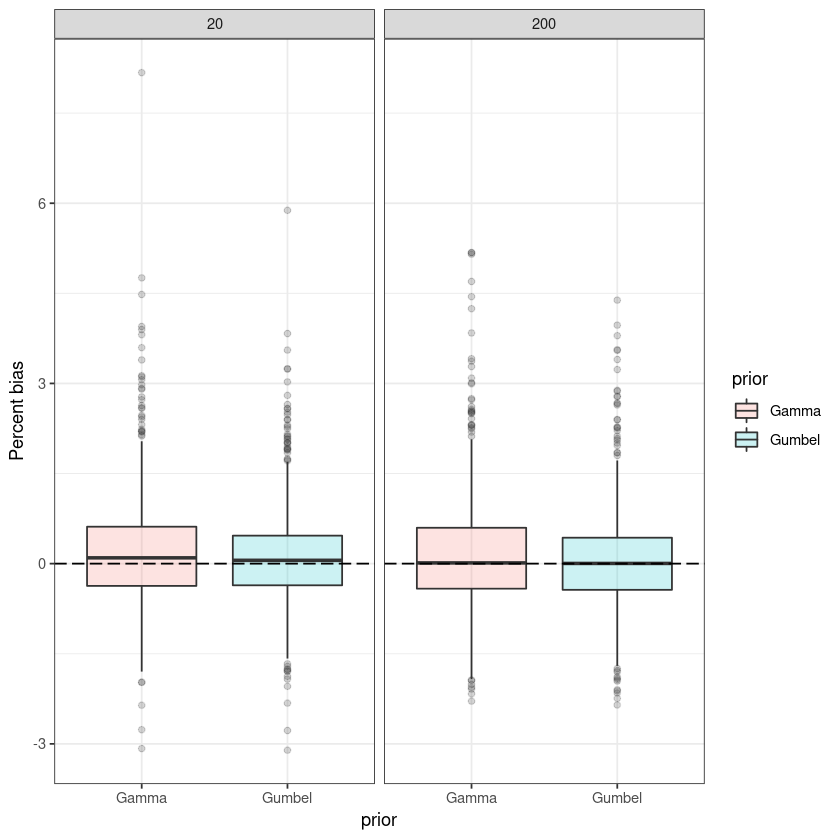

In [8]:
p0 <- ggplot(data = errors_dt, aes(x = prior, y = bias, fill= prior)) + 
  geom_boxplot(alpha = .2) +
  scale_y_continuous("Percent bias") + 
  geom_hline(yintercept = 0, linetype = "longdash") +
  facet_grid(.~ ntaxa) +
  theme_bw()
p0

In [9]:
ggsave("figures/bias_phylodyn.pdf", plot = p0)

Saving 6.67 x 6.67 in image



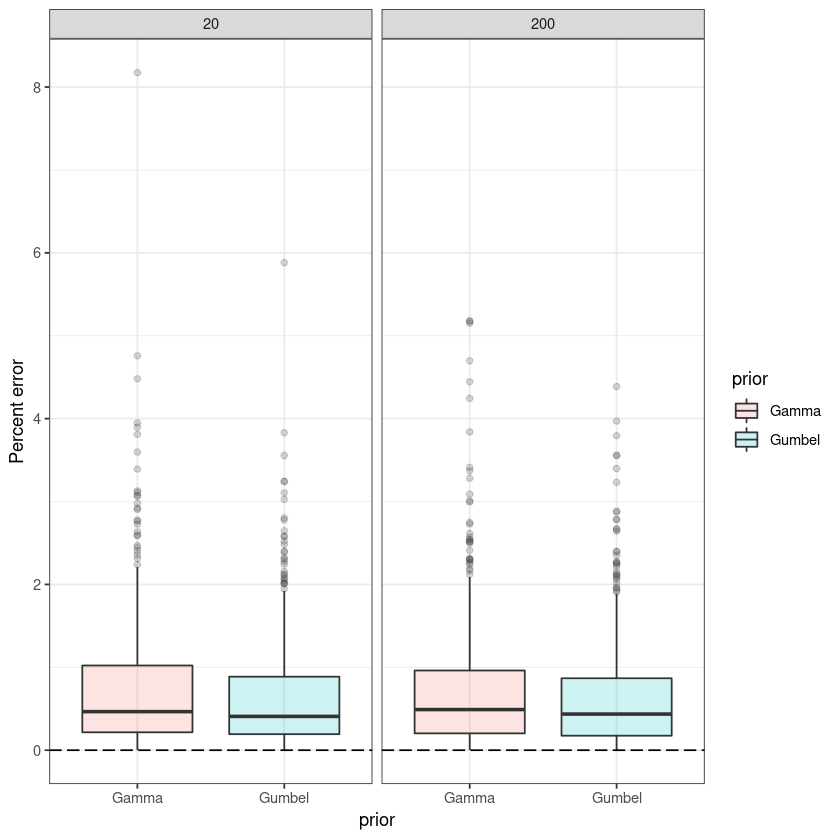

In [10]:
p0b <- ggplot(data = errors_dt, aes(x = prior, y = abs(bias), fill= prior)) + 
  geom_boxplot(alpha = .2) +
  scale_y_continuous("Percent error") + 
  geom_hline(yintercept = 0, linetype = "longdash") +
  facet_grid(.~ ntaxa) +
  theme_bw()
p0b

In [11]:
ggsave("figures/error_phylodyn.pdf", plot = p0b)

Saving 6.67 x 6.67 in image



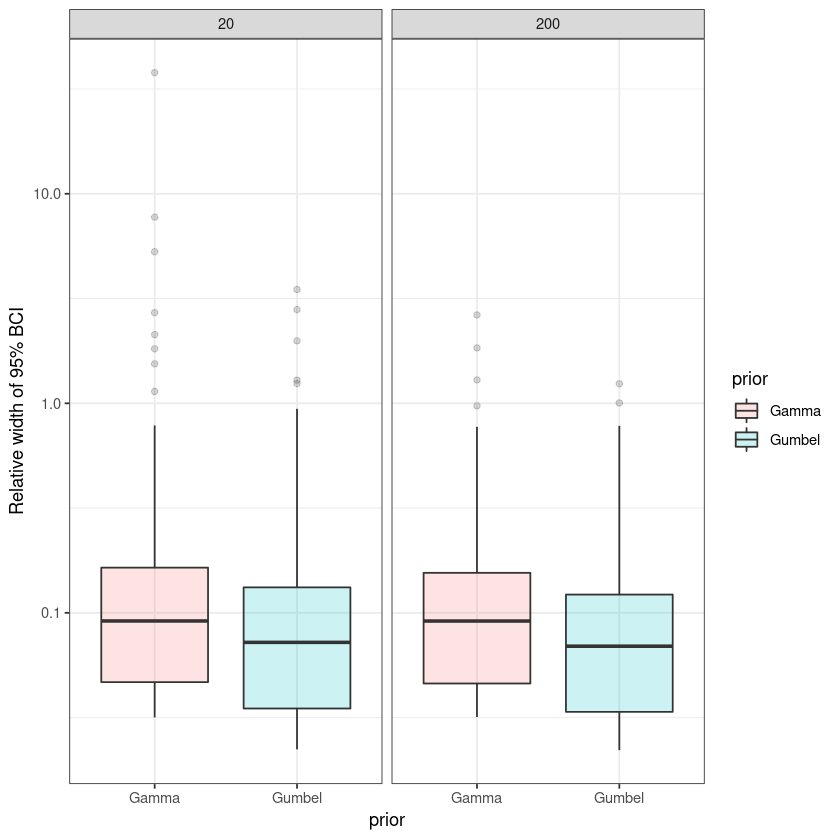

In [12]:
p1 <- ggplot(data = errors_dt, aes(x = prior, y = widths, fill= prior)) + 
  geom_boxplot(alpha = .2) +
  scale_y_log10("Relative width of 95% BCI") +
  facet_grid(.~ ntaxa) +
  theme_bw()
p1

In [13]:
aggregate(errors_dt[, c("bias", "widths")],
          by = list(errors_dt$ntaxa, errors_dt$prior),FUN = mean)

Group.1,Group.2,bias,widths
<chr>,<chr>,<dbl>,<dbl>
20,Gamma,0.24049518,0.24386531
200,Gamma,0.18452355,0.13437615
20,Gumbel,0.13638233,0.12020660
200,Gumbel,0.07582526,0.09861688


In [14]:
aggregate(errors_dt[, c("bias", "widths")],
          by = list(errors_dt$ntaxa, errors_dt$prior),FUN = median)

Group.1,Group.2,bias,widths
<chr>,<chr>,<dbl>,<dbl>
20,Gamma,0.096928647,0.09145899
200,Gamma,0.012752837,0.09137991
20,Gumbel,0.055059887,0.07228269
200,Gumbel,0.003710357,0.06930695


In [15]:
ggsave("BCI_width_phylodyn.pdf", plot = p1)

Saving 6.67 x 6.67 in image



In [16]:
summaries_gamma_20taxa <- do.call(rbind, lapply(1:nrep, function(i) {
  data.frame(reconstructions_20taxa_gamma[[i]]$summary, replicate = i, prior = "Gamma", ntaxa = "20")
} ))
summaries_gumbel_20taxa <- do.call(rbind, lapply(1:nrep, function(i) {
  data.frame(reconstructions_20taxa_gumbel[[i]]$summary, replicate = i, prior = "Gumbel", ntaxa = "20")
} ))

summaries_gamma_200taxa <- do.call(rbind, lapply(1:nrep, function(i) {
  data.frame(reconstructions_200taxa_gamma[[i]]$summary, replicate = i, prior = "Gamma", ntaxa = "200")
} ))
summaries_gumbel_200taxa <- do.call(rbind, lapply(1:nrep, function(i) {
  data.frame(reconstructions_200taxa_gumbel[[i]]$summary, replicate = i, prior = "Gumbel", ntaxa = "200")
} ))



all_estimates <- rbind(summaries_gamma_20taxa, summaries_gumbel_20taxa,
                      summaries_gamma_200taxa, summaries_gumbel_200taxa)
all_estimates$ntaxa <- as.factor(all_estimates$ntaxa)
head(all_estimates)

,time,mean,sd,quant0.025,quant0.5,quant0.975,replicate,prior,ntaxa
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<chr>,<fct>
1,1992.795,15.13034,11.156900,3.763378,14.55076,76.80671,1,Gamma,20
2,1993.263,15.11662,10.902847,3.888109,14.54170,74.08815,1,Gamma,20
3,1993.730,15.10157,10.642538,4.019582,14.53176,71.39466,1,Gamma,20
4,1994.197,15.08498,10.375470,4.158333,14.52080,68.72427,1,Gamma,20
5,1994.664,15.06661,10.101063,4.304950,14.50864,66.07476,1,Gamma,20
6,1995.131,15.04609,9.818626,4.460074,14.49505,63.44348,1,Gamma,20


Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


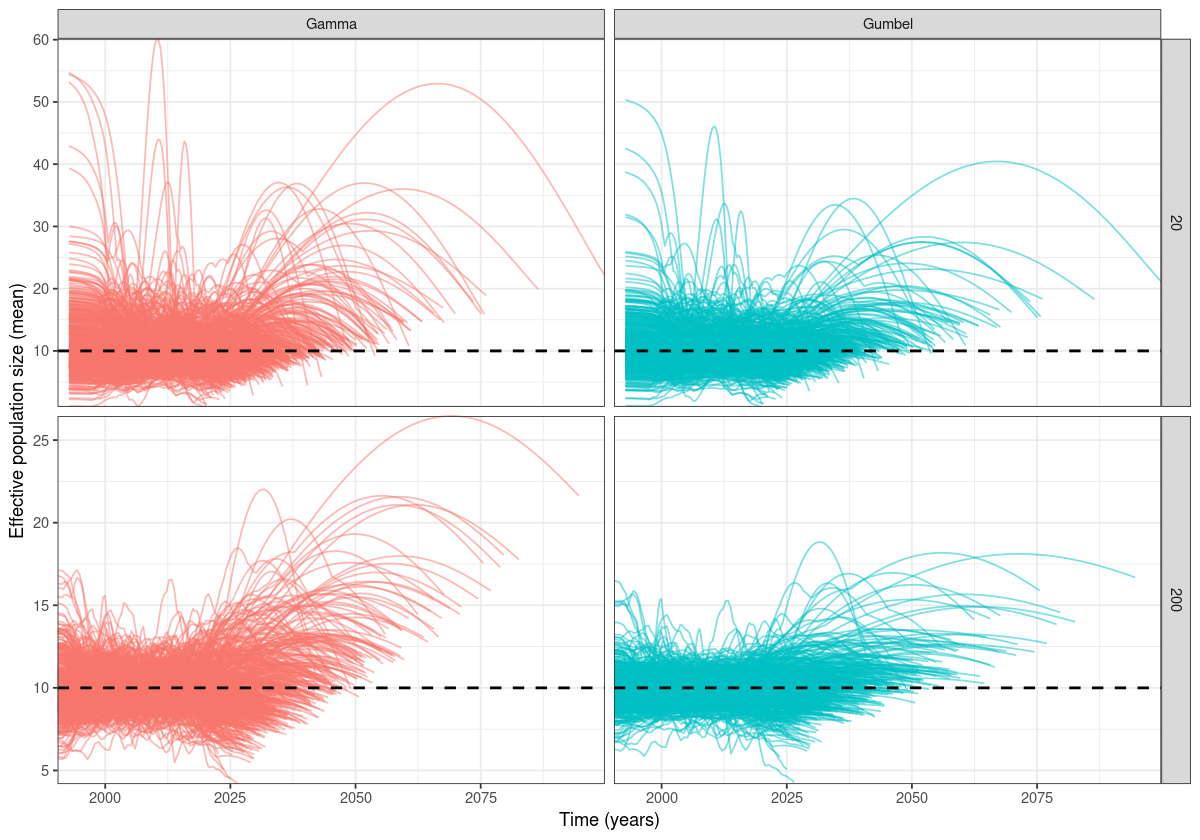

In [17]:
for_plot <- all_estimates
for_plot$replicate <- as.factor(for_plot$replicate)
options(repr.plot.width = 10, repr.plot.height = 7)
p2 <- ggplot(data = for_plot, aes(x = time, y = mean, col = prior, group = replicate)) +  
  scale_x_continuous("Time (years)", expand = c(0, 0)) +
  scale_y_continuous("Effective population size (mean)", expand = c(0, 0)) + 
  geom_line(alpha = .5) +
  facet_grid(ntaxa~prior, scales = "free_y") +  
  guides(col = FALSE) + 
  theme_bw() +
  geom_hline(yintercept = 10, linetype = "dashed", size = .8)+
  NULL
p2

In [18]:
ggsave("figures/trajectories_mean_phylodyn.pdf",
       plot = p2)

Saving 6.67 x 6.67 in image



Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


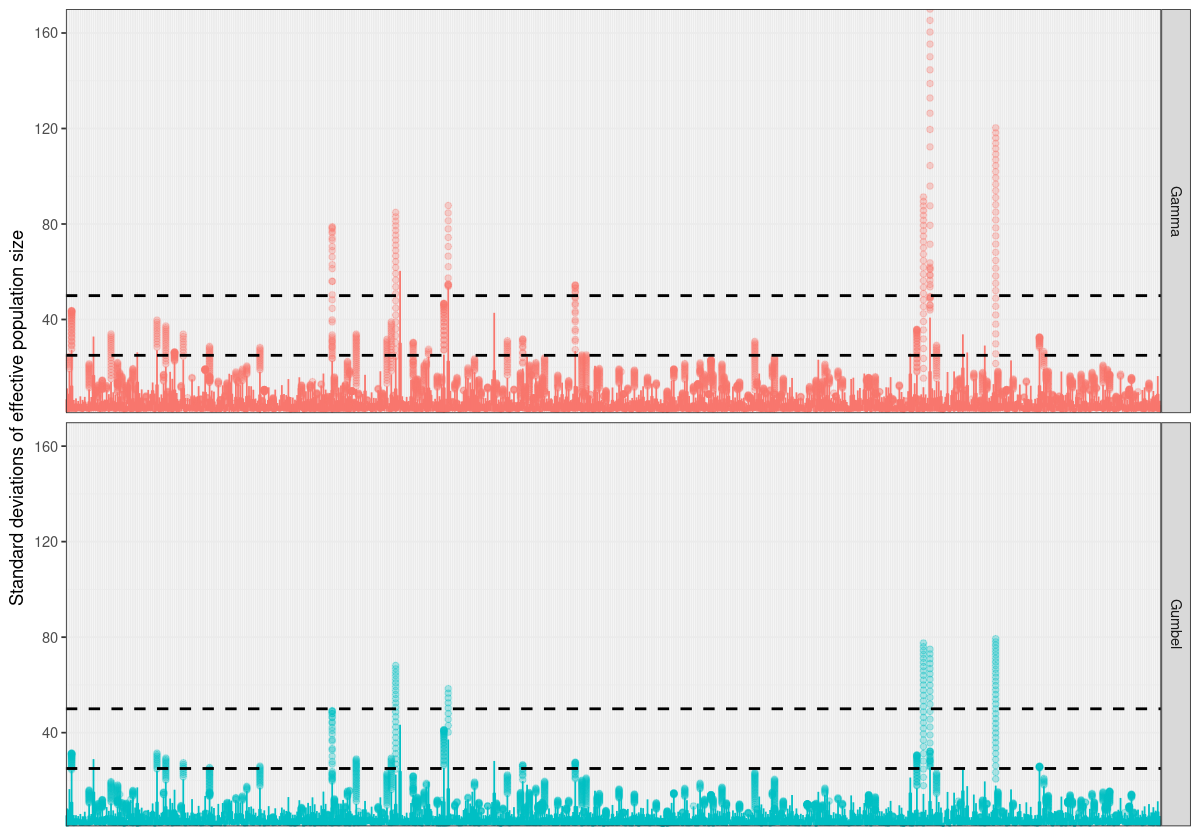

In [19]:
p3 <- ggplot(data = for_plot, aes(x = replicate, y = sd, col = prior)) + 
  geom_boxplot(alpha = .3) +
  scale_y_continuous("Standard deviations of effective population size", expand = c(0, 0)) + 
  facet_grid(prior~.) +
  guides(col = FALSE) + 
  geom_hline(yintercept = 25, linetype = "dashed", size = .8) +
  geom_hline(yintercept = 50, linetype = "dashed", size = .8) +
  theme_bw() +
  theme(axis.title.x=element_blank(),
        axis.text.x=element_blank(),
        axis.ticks.x=element_blank()) +
  NULL
p3

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


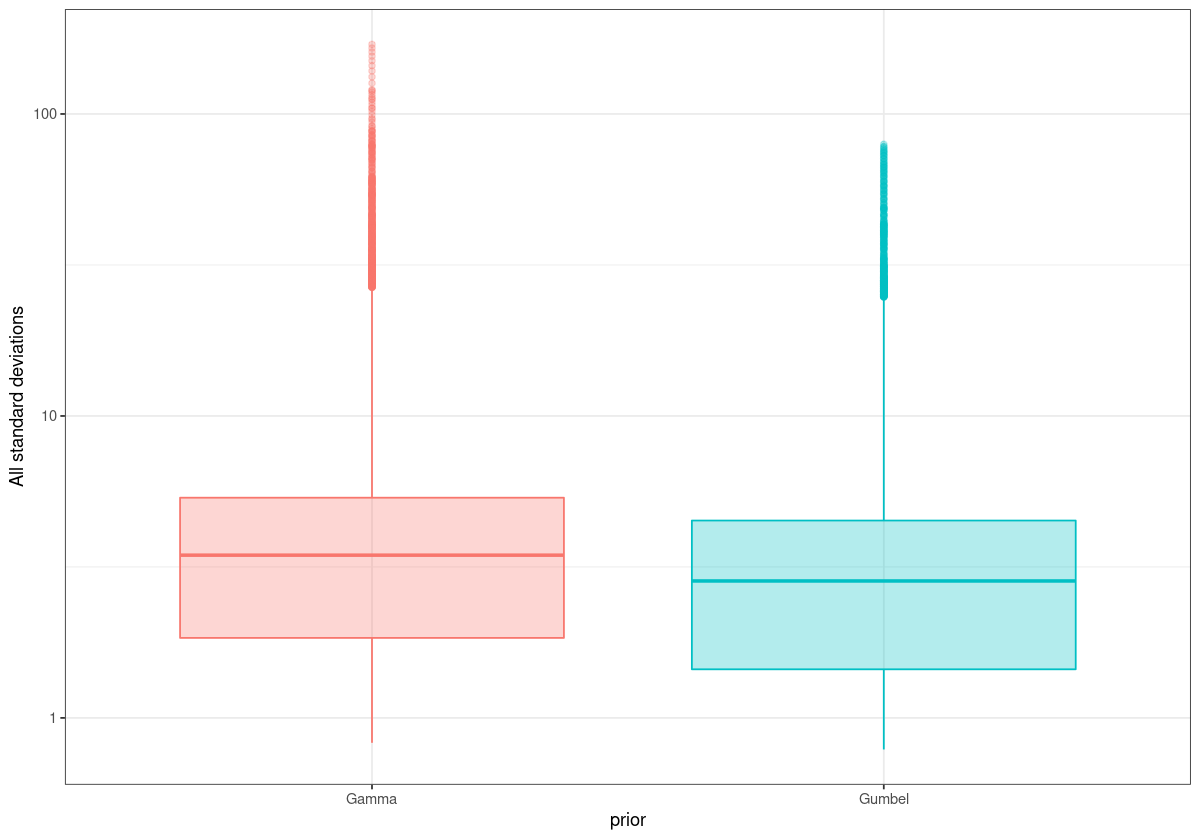

In [20]:
p4 <- ggplot(data = for_plot, aes(x = prior, y = sd, col = prior, fill = prior)) + 
  geom_boxplot(alpha = .3) +
  scale_y_log10("All standard deviations") + 
  guides(col = FALSE) + 
  guides(fill = FALSE) + 
  theme_bw() +
  NULL
p4

In [21]:
aggregate(for_plot[, c("mean", "sd")],
          by = list(for_plot$ntaxa, for_plot$prior), FUN = mean)

Group.1,Group.2,mean,sd
<fct>,<chr>,<dbl>,<dbl>
20,Gamma,11.15075,6.504897
200,Gamma,10.22882,2.536746
20,Gumbel,10.76058,5.417013
200,Gumbel,10.09477,1.846835


In [22]:
aggregate(for_plot[, c("mean", "sd")],
          by = list(for_plot$ntaxa, for_plot$prior), FUN = median)

Group.1,Group.2,mean,sd
<fct>,<chr>,<dbl>,<dbl>
20,Gamma,10.311139,4.989961
200,Gamma,9.999608,1.851659
20,Gumbel,10.196757,4.358207
200,Gumbel,10.006541,1.453207
